In [26]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import mcount
import numpy as np

# Some Results

In [55]:
raw_data = pd.read_csv("cities_with_population.csv")
data_1 = raw_data[raw_data.Nodes.notnull()]
data_1 = data_1[data_1.Population.notnull()]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E932FF148>,
      dtype=object)

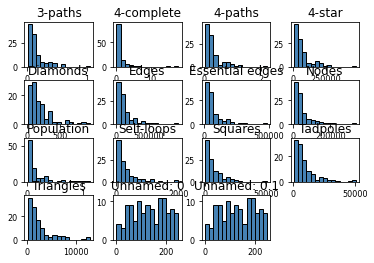

In [56]:
data_1.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)       

In [57]:
data_1 = data_1.drop(columns =['Unnamed: 0', 'Unnamed: 0.1'])
data_1

,City,Country,Continent,Nodes,Edges,Essential edges,Self-loops,3-paths,Triangles,4-paths,4-complete,4-star,Squares,Diamonds,Tadpoles,Population
0,New_Delhi,India,Asia,15161.0,37422.0,20696.0,143.0,41788.0,752.0,82908.0,1.0,17522.0,1846.0,66.0,2874.0,302363.0
4,Sao_Paulo,Brazil,South_America,152091.0,388905.0,220572.0,457.0,472196.0,8006.0,999790.0,1.0,210575.0,22202.0,454.0,31539.0,11152968.0
5,Cairo,Egypt,Africa,202489.0,500126.0,288190.0,989.0,591436.0,7122.0,1203125.0,0.0,239880.0,27200.0,346.0,25182.0,6800992.0
13,Nairobi,Kenya,Africa,46932.0,114704.0,59108.0,538.0,110863.0,1709.0,201823.0,1.0,42716.0,3266.0,86.0,5923.0,3133518.0
24,Paris,France,Europe,40473.0,98627.0,60425.0,136.0,138973.0,2881.0,314914.0,3.0,73016.0,7378.0,328.0,14059.0,9643880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,El_Alto,Bolivia,South_America,46362.0,139891.0,72932.0,40.0,168793.0,958.0,389233.0,0.0,82725.0,10810.0,49.0,4316.0,647350.0
244,Chiclayo,Peru,South_America,4146.0,11394.0,6418.0,8.0,14593.0,125.0,33214.0,0.0,7002.0,948.0,2.0,512.0,500561.0
247,Talca,Chile,South_America,10123.0,27065.0,14686.0,72.0,31932.0,422.0,69138.0,0.0,14886.0,1912.0,44.0,1717.0,191154.0
248,Novosibirsk,Russia,Asia,55698.0,155869.0,78790.0,308.0,169682.0,3074.0,360200.0,0.0,80269.0,8212.0,232.0,13217.0,1405569.0


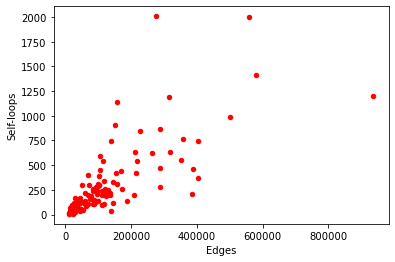

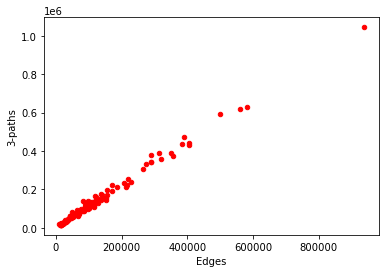

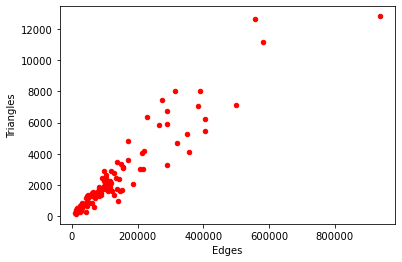

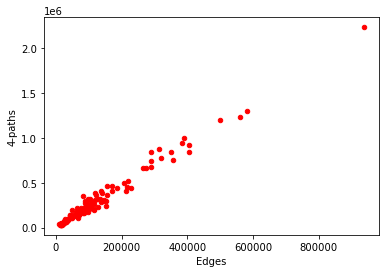

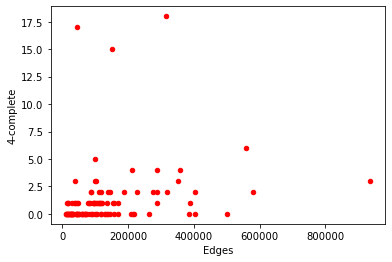

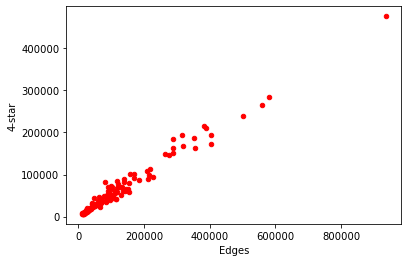

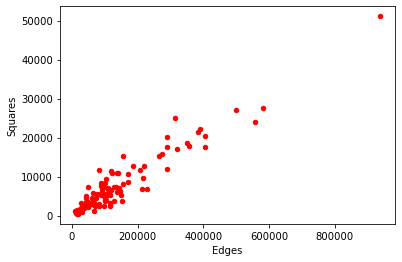

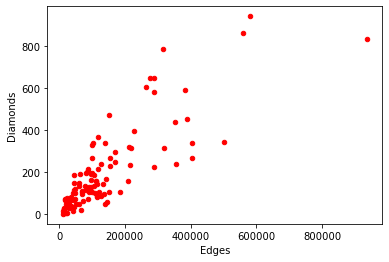

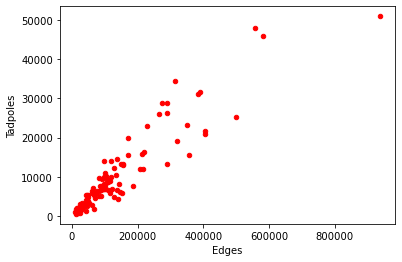

In [58]:
for column in list(data_1.columns.values)[6:15]:
    data_1.plot(kind='scatter',x='Edges',y=column,color='red')
    plt.show()

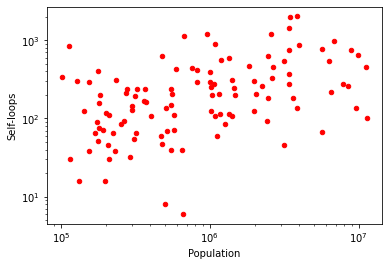

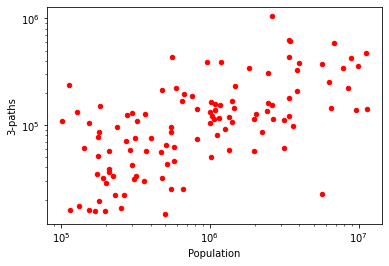

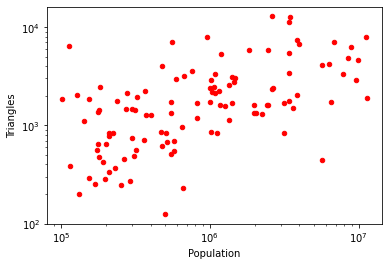

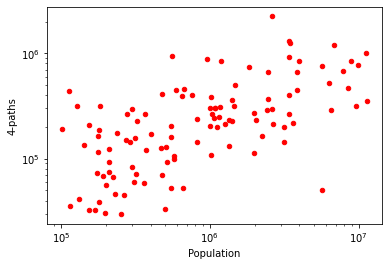

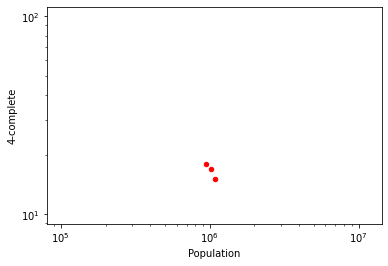

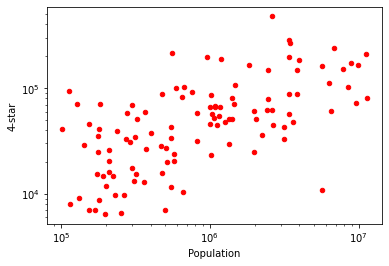

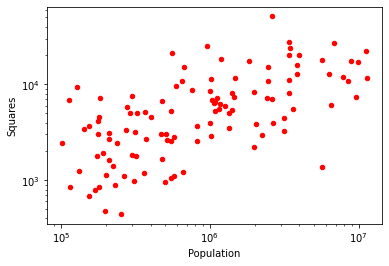

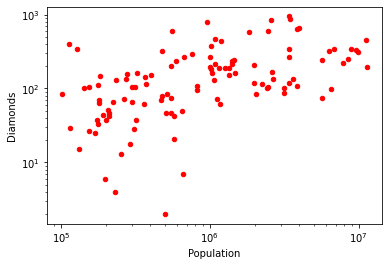

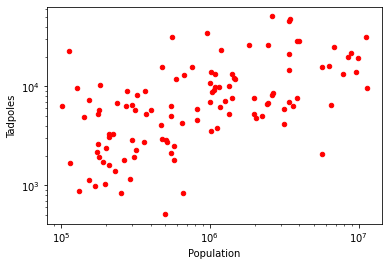

In [59]:
for column in list(data_1.columns.values)[6:15]:
    data_1.plot(loglog=True, kind='scatter',x='Population',y=column,color='red')
    plt.show()

Now let's try with the number of non-nested motifs instead. I will create a new dataframe for that:

In [60]:
#First we copy the subgraph chunk of the dataframe. Note that I don't count the self-loops here, as they are non-nested:
data_sg = data_1[list(data_1.columns.values)[7:15]]
sg_arr = data_sg.values
sg_nnest_arr = []

for row in sg_arr:
    motifs = row
    nnest = mcount.get_nnest_motifvector(motifs)
    sg_nnest_arr.append(nnest)

sg_nnest_arr = np.asarray(sg_nnest_arr)
#print(sg_nnest_arr.shape)
#print(sg_nnest_arr)


In [61]:
data_nnest_sg = pd.DataFrame(data = sg_nnest_arr,columns=list(data_1.columns.values)[7:15])

In [64]:
#Now we need to concatenate all pieces of our dataframe into a data_2 df:
df_1 = data_1[list(data_1.columns.values)[:7]]
df_2 = data_nnest_sg
df_3 = data_1["Population"]

#reset index: 
df_1 = df_1.reset_index(drop=True)
df_2 = df_2.reset_index(drop=True)
df_3 = df_3.reset_index(drop=True)

#concatenate all 3:
data_2 = pd.concat([df_1, df_2, df_3], axis=1)

In [65]:
data_2

,City,Country,Continent,Nodes,Edges,Essential edges,Self-loops,3-paths,Triangles,4-paths,4-complete,4-star,Squares,Diamonds,Tadpoles,Population
0,New_Delhi,India,Asia,15161.0,37422.0,20696.0,143.0,39532.0,752.0,70160.0,1.0,14776.0,1783.0,60.0,2622.0,302363.0
1,Sao_Paulo,Brazil,South_America,152091.0,388905.0,220572.0,457.0,448178.0,8006.0,850616.0,1.0,179940.0,21751.0,448.0,29735.0,11152968.0
2,Cairo,Egypt,Africa,202489.0,500126.0,288190.0,989.0,570070.0,7122.0,1046037.0,0.0,215390.0,26854.0,346.0,23798.0,6800992.0
3,Nairobi,Kenya,Africa,46932.0,114704.0,59108.0,538.0,105736.0,1709.0,177417.0,1.0,36961.0,3183.0,80.0,5591.0,3133518.0
4,Paris,France,Europe,40473.0,98627.0,60425.0,136.0,130330.0,2881.0,259216.0,3.0,59601.0,7059.0,310.0,12783.0,9643880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,El_Alto,Bolivia,South_America,46362.0,139891.0,72932.0,40.0,165919.0,958.0,337655.0,0.0,78507.0,10761.0,49.0,4120.0,647350.0
108,Chiclayo,Peru,South_America,4146.0,11394.0,6418.0,8.0,14218.0,125.0,28410.0,0.0,6494.0,946.0,2.0,504.0,500561.0
109,Talca,Chile,South_America,10123.0,27065.0,14686.0,72.0,30666.0,422.0,58320.0,0.0,13257.0,1868.0,44.0,1541.0,191154.0
110,Novosibirsk,Russia,Asia,55698.0,155869.0,78790.0,308.0,160460.0,3074.0,302310.0,0.0,67516.0,7980.0,232.0,12289.0,1405569.0


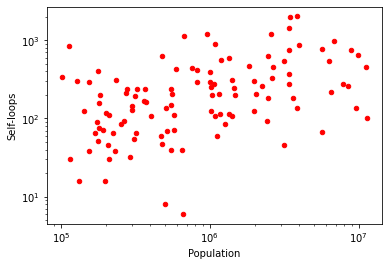

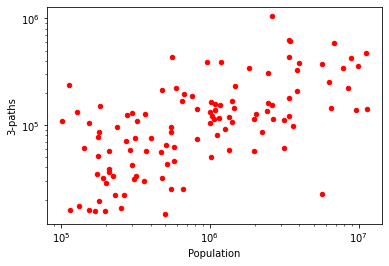

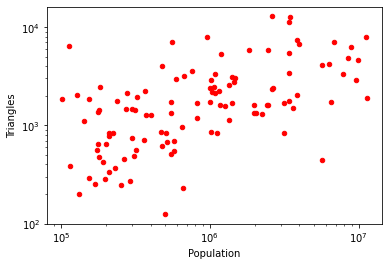

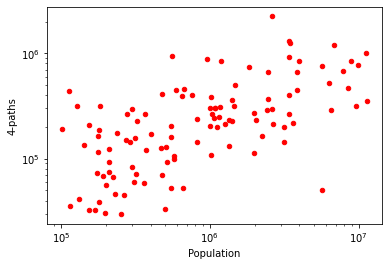

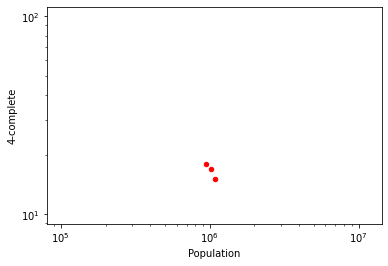

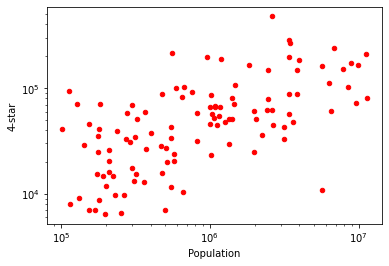

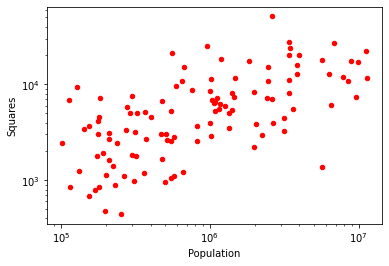

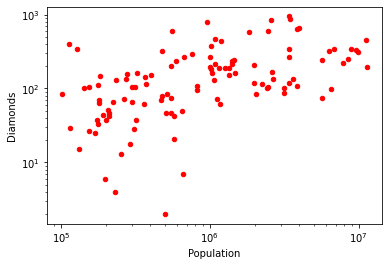

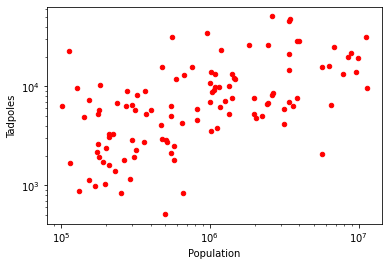

In [66]:
for column in list(data_2.columns.values)[6:15]:
    data_1.plot(loglog=True, kind='scatter',x='Population',y=column,color='red')
    plt.show()